## **Введение в Python**

### **Занятие 2. Модули numpy и matplotlib.**

**Что сегодня по плану?**\
На этом занятии мы будем обсуждать два ключевых модуля для работы с данными на `Python`.\
`NumPy` &mdash; Работа с n-мерными массивами данных, операции с матрицами.\
`Matplotlib` &mdash; мощный модуль для построения графиков с большой гибкостью.\
Еще сегодня мимоходом затронем модуль `AstroPY`, а именно его часть `astropy.io.fits`.

**Зачем это нужно нам?**\
Типичный процесс работы с данными в астрофизике:
1. скачать данные с сервера;
2. открыть данные в FITS-формате;
3. выполнить необходимую обработку;
4. нарисовать репрезентативные графики;
5. представить результаты общественности.

Нетрудно увидеть, что сегодня мы постараемся покрыть все аспекты этой работы, кроме первого и последнего.

#### **Часть 0. Коротко про модули.**

**Модули** &mdash; это самостоятельные блоки кода на `Python`, которые можно включать в свои проекты.\
Модули, как правило, состоят из набора функций или классов, которые направлены на решение конкретных задач.

**Установка.**\
Для установки модулей обычно достаточно использовать команду `pip` (или `conda`, если вы используете Anaconda).\
Например, сегодня нам пригодятся модули `numpy`, `matplotlib` и `astropy`.\
Для их установки используем **в консоли** команду:
``` bash
pip install numpy matplotlib astropy
```

Альтернативно, среда Jupyter Notebook позволяет выполнять консольные команды прямо из ячейки.\
Для этого нужно прописать ту же команду, но со знаком `!`, как показано в ячейке ниже:

In [1]:
# РАСКОМЕНТИРУЙТЕ ТУ СТРОЧКУ, КОТОРАЯ ПОДХОДИТ ВАШЕЙ СРЕДЕ.

# PIP ЕСЛИ ВЫ ИСПОЛЬЗУЕТЕ ОБЫЧНЫЙ PYTHON
# !pip install numpy matplotlib astropy

# CONDA ЕСЛИ ВЫ ИСПОЛЬЗУЕТЕ ВИРТУАЛЬНОЕ ОКРУЖЕНИЕ ВНУТРИ ANACONDA
# !conda install numpy matplotlib astropy

**Использование в своем коде.**\
Чтобы использовать функицонал установленных модулей, необходимо импортировать их в свой проект.\
Вне зависимости от того, работаете вы в Jupyter-ноутбуке или в чистом Py-файле, импорт модулей выглядит так:

```python
import numpy
```
В этом случае вызов функций, содержащихся в модуле, должен быть прописан через точку:

```python
x = numpy.linspace(0, 1, 100)
```

Для модулей внутри конкретного проекта можно задать «псевдоним» (alias):

``` python
import numpy as np
x = np.linspace(0, 1, 100)
```
\
**Подмодули.**\
Модули могут иметь внутри себя древовидную структуру подмодулей, которые можно вызывать отдельно:
```python
import matplotlib.pyplot as plt
```
Или при помощи специального синтаксиса `from ... import ...`:
```python
from matplotlib import pyplot as plt
```

\
**Импорт конкретных функций.**\
Иногда в работе удобно, вместо импорта всего модуля, сделать импорт только конкретных функций.\
Это так же делается с помощью `from ... import ...`:

```python
from numpy import linspace
```

Вызов функции (или подмодуля), в этом случае, не требует приписки модуля через точку:
```python
x = linspace(0, 1, 100)
```

С помощью спецсимвола `*` можно импортировать в проект все существующие функции и классы:
``` python
from numpy import *
```
Я призываю так **не делать НИКОГДА**, потому что:
- есть риск уничтожить пространство имен, смешивая названия из разных модулей;
- в больших проектах трудно никогда понять, откуда взялась та или иная функция, если у нее нет префикса типа np.

\
**Стандартный вид импорта**, который повсеместно встречается в туториалах, документации и чужом коде:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io.fits import getdata

#### **Часть 1. Массивы в numpy.**

Основной аспект работы в `numpy`, который мы затронем, заключается в использовании **n-мерных массивов**.\
Массивы в `numpy` &mdash; это класс, похожий на список (list), но имеющий ряд важных особенностей.

##### **Инициализация.**
Для начала научимся создавать самый простой 1-мерный массив.

In [3]:
# Стандартный вид импорта
import numpy as np

In [4]:
# ИНИЦИАЛИЗАЦИЯ МАССИВА ИЗ КЛАССОВ ЧИСТОГО PYTHON
my_list = [1, 2, 3, 4]
array = np.array(my_list)
print(array, type(array))

my_tuple = (1., 2., 3.)
array = np.array(my_tuple)
print(array, type(array))

[1 2 3 4] <class 'numpy.ndarray'>
[1. 2. 3.] <class 'numpy.ndarray'>


In [5]:
# ИНИЦИАЛИЗАЦИЯ МАССИВА ПО ЗАДАННЫМ УСЛОВИЯМ
print('10 нулей:', np.zeros(10))
print('5 единиц:', np.ones(5))
print('Числа от 1 до 15 с шагом в 3:', np.arange(1, 15, 3))
print('11 чисел от 0 до 1 с равным интервалом:', np.linspace(0, 1, 11))

10 нулей: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 единиц: [1. 1. 1. 1. 1.]
Числа от 1 до 15 с шагом в 3: [ 1  4  7 10 13]
11 чисел от 0 до 1 с равным интервалом: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Было бы преступлением ограничиться рассмотрением 1-мерных массивов для этого класса, поэтому сразу разберемся, как создавать массивы, например, 2-мерные и 3-мерные:


In [6]:
my_list = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
print('2-мерная матрица размера 3x3:\n', np.array([my_list]))
print('Размерность этого массива:', np.array(my_list).shape)

print('3-мерный массив из единиц размера 3x4x5:\n', np.ones([3, 4, 5]))

2-мерная матрица размера 3x3:
 [[[1 2 3]
  [4 5 6]
  [7 8 9]]]
Размерность этого массива: (3, 3)
3-мерный массив из единиц размера 3x4x5:
 [[[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]]


##### **Отличия от списков.**
У массивов numpy я выделяю 3 основных отличия, которые и делают использование массивов удобными важным для работы:
1. Индексация.
2. Интерпретация операций.
3. Работа с условиями.

Разберем каждый аспект отдельно.

##### **1. Индексация.**

При работе с массивами, особенно большой размерности, часто необходимо обращаться к конкретныму подмножеству элементов массива, которые задаются специфическим образом.\
`numpy` значительно упрощает этот процесс:

In [7]:
array = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

print('0 строка, 0 столбец:', array[0, 0])
print('0 строка полностью:', array[0])
print('0 строка другим спосособом:', array[0, :])
print('0 столбец полностью:', array[:, 0])

# Похоже на работу с индексами в 1-мерных списках, но для n-мерного случая
print('Четные строки:', array[::2, :])
print('Четные строки, нечетные столбцы:', array[::2, 1::2])

0 строка, 0 столбец: 1
0 строка полностью: [1 2 3]
0 строка другим спосособом: [1 2 3]
0 столбец полностью: [1 4 7]
Четные строки: [[1 2 3]
 [7 8 9]]
Четные строки, нечетные столбцы: [[2]
 [8]]


##### **2. Интерпретация операций.**

Ключевая особенность `numpy`-массивов в том, что операции сложения, умножения, деления и всего остального, по возможности, выполняются **по-элементно**.

**Минутка на подумать**.\
*Подумайте, как бы все это было нужно написать на обычных списках.*

In [8]:
print('Удвоенный массив:\n', 2 * array)
print('Массив в квадрате:\n', array ** 2)
print('Массив в квадрате иначе:\n', array * array)
print('Условие на >5:\n', array > 5)

array1 = np.array([[1, 0],
                   [2, 0],
                   [3, 0]])
array2 = np.array([[4, 4],
                   [5, 5],
                   [6, 6]])

print('Сумма массивов:\n', array1 + array2)
print('Частное массивов:\n', array1 / array2)


Удвоенный массив:
 [[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
Массив в квадрате:
 [[ 1  4  9]
 [16 25 36]
 [49 64 81]]
Массив в квадрате иначе:
 [[ 1  4  9]
 [16 25 36]
 [49 64 81]]
Условие на >5:
 [[False False False]
 [False False  True]
 [ True  True  True]]
Сумма массивов:
 [[5 4]
 [7 5]
 [9 6]]
Частное массивов:
 [[0.25 0.  ]
 [0.4  0.  ]
 [0.5  0.  ]]


Помимо таких поэлементных операций, `numpy` умеет интерпретировать массивы как векторы и матрицы прямиком из линейной алгебры:

In [9]:
vector1 = np.array([[1, 2, 3]])
vector2 = np.array([[1], [2], [3]])
print('Вектор-строка (1 строка с 3 элементами):\n', vector1.shape)
print('Вектор-столбец (3 строки по 1 элементу, т.е. один столбик):\n', vector2.shape)

# Эта операция автоматически производит расширение массивов для поэлеметного умножения
print('Поэлементное перемножение:\n', vector1 * vector2)


print('Матричное перемножение (1, 3) x (3, 1) = (1, 1):\n', vector1 @ vector2)
print('Матричное перемножение (3, 1) x (1, 3) = (3, 3):\n', vector2 @ vector1)

Вектор-строка (1 строка с 3 элементами):
 (1, 3)
Вектор-столбец (3 строки по 1 элементу, т.е. один столбик):
 (3, 1)
Поэлементное перемножение:
 [[1 2 3]
 [2 4 6]
 [3 6 9]]
Матричное перемножение (1, 3) x (3, 1) = (1, 1):
 [[14]]
Матричное перемножение (3, 1) x (1, 3) = (3, 3):
 [[1 2 3]
 [2 4 6]
 [3 6 9]]


Наконец, в модуле `numpy` есть **МНОГО** функций, приспособленных для выполнения самых разных операций:

In [10]:
x = np.linspace(0, 1, 5)
print(x)

print('sin(x):\n', np.sin(x))

print('min(x):\n', np.min(x))
print('max(x):\n', x.max()) # x - это объект класса np.ndarray, у которого есть встренные методы.

random_nums = np.random.random((3,3))
print('Случайные числа:\n', random_nums)

[0.   0.25 0.5  0.75 1.  ]
sin(x):
 [0.         0.24740396 0.47942554 0.68163876 0.84147098]
min(x):
 0.0
max(x):
 1.0
Случайные числа:
 [[0.93823074 0.65048832 0.05466009]
 [0.19217918 0.19036295 0.28390141]
 [0.9288145  0.65397687 0.41253504]]


Мы не будем разбирать все существующие функции для массивов. Вместо этого предлагаю искать среди них ту, которая вам понадобится, по необходимости.
Для этого есть [очень подробная и хорошо структурированная документация](https://numpy.org/doc/stable/reference/routines.html).

##### **3. Работа с условиями.**

Еще одним могучим преимуществом `numpy` над обычными списками является эффективная и простая работа с условиями:\
Вместо индексов массиву можно передать другой массив того же размера типа bool, чтобы получить доступ только к конкретным элементам:

In [11]:
array = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
print(array)

print('Условие «> 5»:\n', array > 5)

print('Элементы, удовлетворяющие условию:\n', array[array>5])

array[array>5] = 0 # Эти элементы можно модифицировать, и они изменяться в изначальном массиве.

print('Массив после модификации:\n', array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Условие «> 5»:
 [[False False False]
 [False False  True]
 [ True  True  True]]
Элементы, удовлетворяющие условию:
 [6 7 8 9]
Массив после модификации:
 [[1 2 3]
 [4 5 0]
 [0 0 0]]


С большой силой приходит большая ответственность за то, чтобы не сломать свой код.\
При работе с массивами и изменениями имейте в виду, что даже в функции изменится **изначальный массив**,\
а значит, вы рискуете изменить данные, которые не должны.

Чтобы этого избежать, рекомендую внутри своих функций работать с копией массива:

```python
my_array = array.copy()
```

Отметим еще, что bool-массив совершенно не обязательно генерировать из того же массива, на который мы его наложим.\
Достаточно, чтобы они были одного размера:

In [12]:
x = np.linspace(0, 2*np.pi, 10) # np.pi - это просто константа пи
y = np.sin(x)
print('x:\n', x)
print('y:\n', y)

print('x[y>0]:\n',x[y>0])
print('y[y>0]:\n',y[y>0])

x:
 [0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361 6.28318531]
y:
 [ 0.00000000e+00  6.42787610e-01  9.84807753e-01  8.66025404e-01
  3.42020143e-01 -3.42020143e-01 -8.66025404e-01 -9.84807753e-01
 -6.42787610e-01 -2.44929360e-16]
x[y>0]:
 [0.6981317 1.3962634 2.0943951 2.7925268]
y[y>0]:
 [0.64278761 0.98480775 0.8660254  0.34202014]


На этом заканчиваем короткое введение в работу с массивами `numpy` и переходим ко второй части занятия.

#### **Часть 2. Графики в matplotlib.**

`Matplotlib` &mdash; это модуль для построения графиков, в котором можно гибко настраивать под свои нужды самые разные аспекты рисунка.\
В рамках этого занятия мы постараемся разборать несколько основных подходов к построению графиков, основные типы представления информации\
и некоторые настраиваемые параметры, которые очень желательно знать. 

##### **Инициализация.**

В модуле `matplotlib` содержится несколько подмодулей различного назначения,\
но для решения 90% задач хватает одного конкретного:\
`matplotlib.pyplot`

In [13]:
import matplotlib.pyplot as plt

##### **Фундамент построения графиков.**

Наиболее простым примером построения графика является обычный `plot`.\
Рассмотрим его на простейшем примере графика синуса.

In [14]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

Структура, которую мы будем держать в голове, при задании графиков:

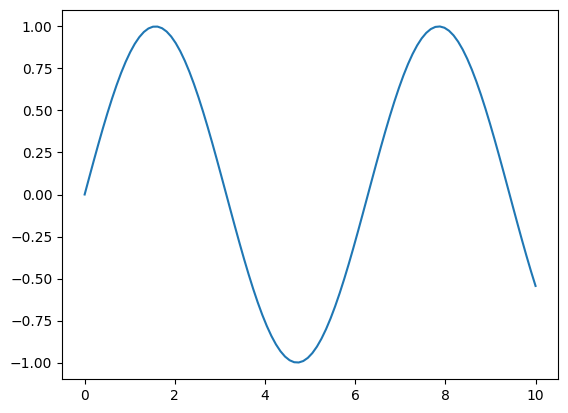

In [15]:
plt.close()                 # Закрыть все прошлые окна (если они есть)
plt.figure()                # Создать фигуру: полотно, на которым мы будем помещать оси
plt.subplot()               # Создать оси, в которых мы будем рисовать
plt.plot(x, y)              # Нанести данные на выбранные оси
plt.show()                  # Показать полученное полотно

Некоторые части этого процесса можно пропускать или совмещать, но внутри `matplotlib` процедура\
построения графиков работает примерно таким образом.

Наиболее минималистичный пример, который можно привести, включает явно всего три из этих шагов:

*Строго говоря, в отдельных случаях первый и последний шаги тоже можно опустить.*\
*Я, однако, всегда включаю их в свой код, потому что часто работаю именно*\
*с интерактивными окнами в ноутбуках, где это принципиально важно.*

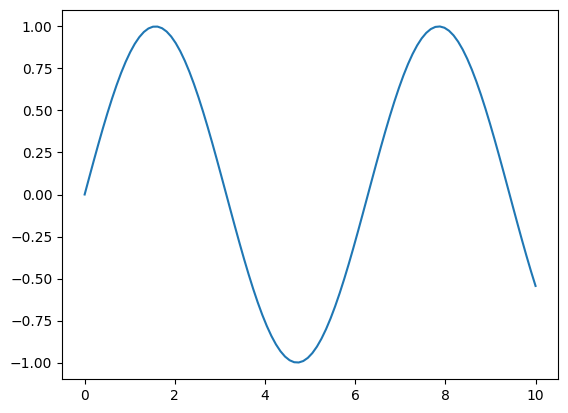

In [16]:
plt.close()
plt.plot(x, y)      # При создании plot фигура и оси были заданы автоматически
plt.show()

**Какие параметры можно крутить здесь.**

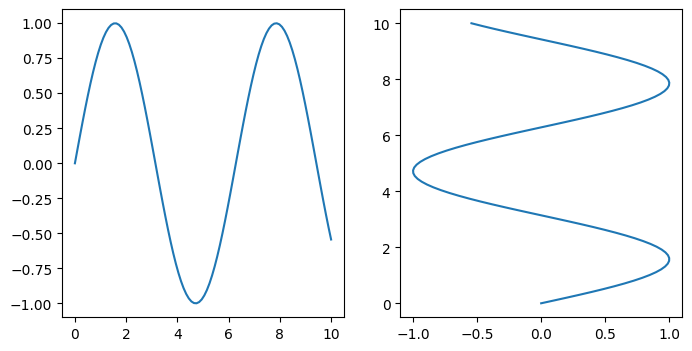

In [17]:
plt.close()
plt.figure(figsize=(8, 4))  # Тут мы задали размер нашей фигуры

plt.subplot(1, 2, 1)        # Тут мы задали на фигуре две пары осей, 1 ряд, 2 столбца, выбрали 1 оси
plt.plot(x, y)              # Последний аргумент задает, на какой оси мы сейчас будем работать.

plt.subplot(1, 2, 2)        # Переключились на вторые оси, обозначенные индексом 2.
plt.plot(y, x)

plt.show()


**Более продвинутый способ задания.**

**Команда `plt.subplots()`:**\
Одновременное задается и фигура, и оси.\
В данном случае созданы 1 строка, 2 столбца.

`figsize` отвечает размеру фигуры.\
`width_ratios` и `height_ratios` позволяют контролировать отношения размеров.

Оси задаются явными объектами `ax[0]` и `ax[1]`.\
Здесь мы выбираем, в какие оси нарисовать данные, выбором объекта, метод которого вызываем.

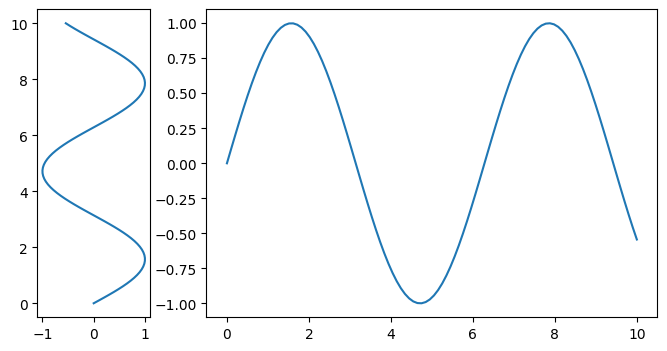

In [18]:
plt.close()
fig, ax = plt.subplots(1, 2, figsize=(8, 4), width_ratios=[1, 4])
ax[0].plot(y, x)
ax[1].plot(x, y)
plt.show()

Есть и другие подходы, более низкоуровневые, но мы сконцентрируемся на последнем из рассмотренных,\
так как он дает достаточно гибкости для большинства задач, не перегружая мозги ужасом\
низкоуровневого менеджмента.

##### **Составные части графика.**

Немного освоились с фундаментом, теперь попробуем понять, что можно крутить\
на каждой отдельно взятой паре осей.

Ниже приведен пример страшного издевательства на графиком, в котором показано все,\
что хорошо знать без необходимости обращаться к гуглу.

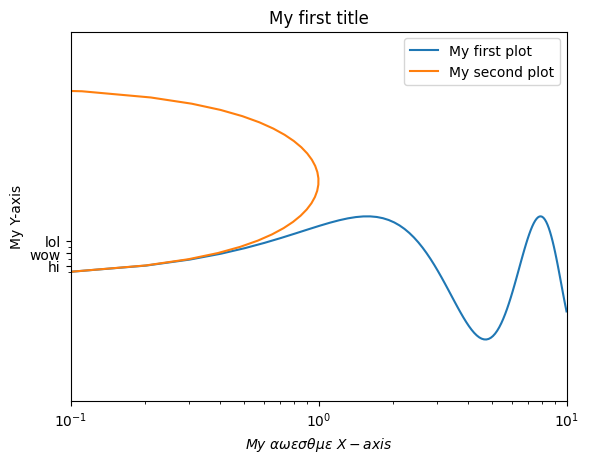

In [19]:
plt.close()
fig, ax = plt.subplots()                   # Задали оси по умолчанию. 1 строка, 1 столбец без других параметров

ax.set_title('My first title')             # Задаем название всей пары осей

ax.plot(x, y, label='My first plot')       # Рисуем график, добавим параметр label, название
ax.plot(y, x, label='My second plot')       
ax.legend()                                # Добавим на оси легенду

ax.set_xlabel(r'$My~\alpha \omega \epsilon \sigma \theta \mu \epsilon~X-axis$')
                                           # В подписях можно использовать ТеХ нотацию
ax.set_ylabel('My Y-axis')                 # Добавим подписи к оси x

ax.set_xlim(0.1, 10)                         # Добавим ограничение на область отрисовка по оси x
ax.set_ylim(-2, 4)                         # Добавим ограничение на область отрисовка по оси y

ax.set_xscale('log')                       # Изменим масштаб оси x на логарифмический. (линейный - 'linear')

ax.set_yticks([0.2, 0.4, 0.6])             # Изменим большие пометки на оси y 
ax.set_yticks([0.1, 0.3, 0.5], minor=True) # Изменим малые   пометки на оси y
ax.set_yticklabels(['hi', 'wow', 'lol'])   # Изменим подписи к пометкам на оси y

plt.show()

##### **Основные виды графиков.**

В рамках этого занятия мы разберем 3 вида графиков:
1. `plot`
2. `scatter`
3. `errorbar`

Что мы будем разбирать, но отдельно: `hist`, `imshow`\
Что мы не будем разбирать вообще: [все остальное](https://matplotlib.org/stable/plot_types/index.html).

**plot**

С этим видом графика мы уже познакомились в примерах выше.\
Он служит в основном для построения графиков, соединенных линиями.\
Коротко пройдемся по наиболее часто используемым параметрам.

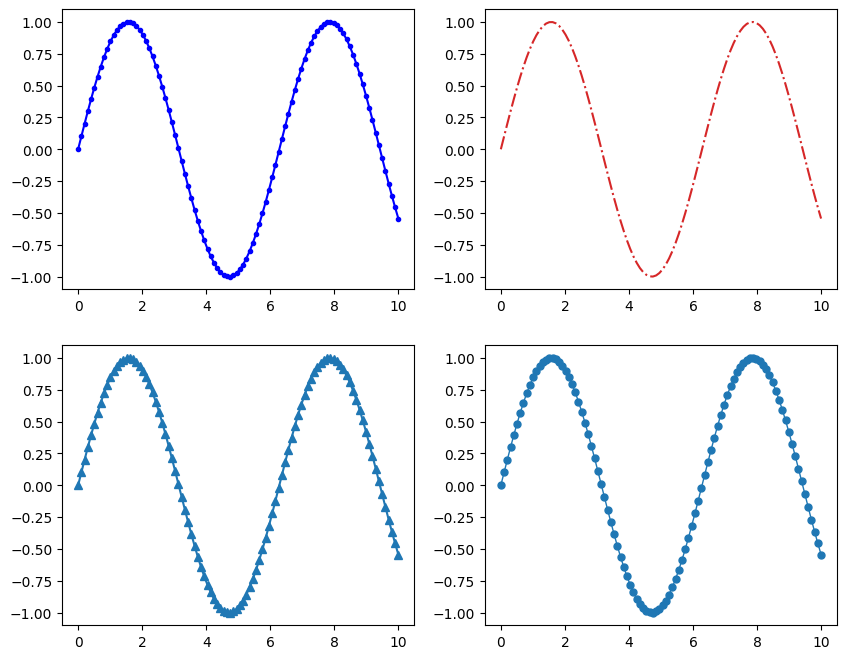

In [20]:
plt.close()
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0,0].plot(x, y, '.-b')                            # 3 позиция -- формат. Маркер + стиль линии + цвет 
ax[0,1].plot(x, y, linestyle='-.', c='tab:red')      # Все эти аспекты формата можно задать отдельно
ax[1,0].plot(x, y, marker='^')                       # marker + linestyle + с
ax[1,1].plot(x, y, '.-', linewidth=1, markersize=10) # У маркера и линии можно задать размеры 
plt.show()

**scatter**\
Это вид графика, при котором ключевую роль играет положение точек.\
Рассмотрим основные параметры.

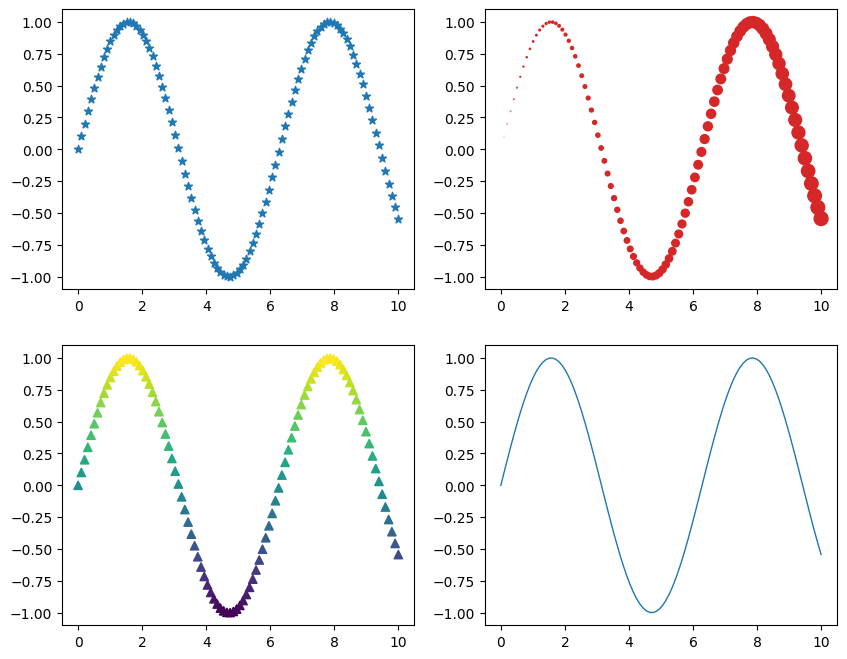

In [21]:
plt.close()
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0,0].scatter(x, y, marker='*')           # Можно задавать различные маркеры, как в plot
ax[0,1].scatter(x, y, s=x**2, c='tab:red')  # Можно задавать каждой точке свой размер
ax[1,0].scatter(x, y, c=y, marker='^')      # Можно окрашивать каждую точку в свой цвет
ax[1,1].plot(x, y, linewidth=1)             # scatter может работать как plot, но тогда про особые фишки можно забыть
plt.show()

**errorbar**\
Особый вид графиков, необходимый для отрисовки данных с ошибками.

Структура функции такова:
```python
plt.errorbar(x, y, err_y, err_x, fmt=plot_format, ...)
```

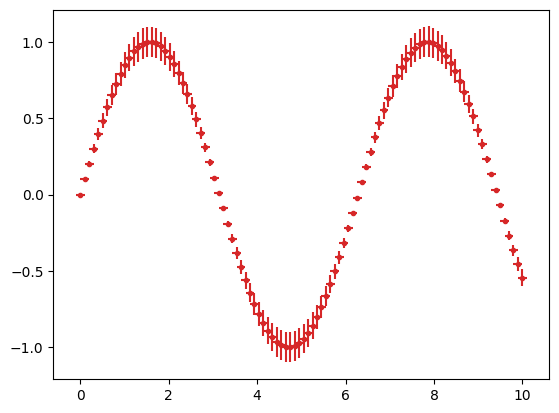

In [22]:
plt.close()
fig, ax = plt.subplots()
plt.errorbar(x, y, 0.1*np.abs(y), 0.1, fmt='.', color='tab:red')
plt.show()

**На этом мы заканчиваем скучное введение и приступаем к нескучной практике.**

#### **Часть 3. Практика, практика, практика.**

На этом занятии вам предлагается выполнить 3 независимых задания.\
Ключевое правило этого практикума:\
Если у вас что-то не получается, или вы не понимаете, что делать, **поднимите руку и спросите**.\
Если гордость не позволяет вам спросить, **не стесняйтесь гуглить**.

##### **Задание 1. Нарисуем затухающий сигнал и его огибающую.**

В этом задании вам необходимо построить задухающий синусоидальный сигнал, затухающий по обратной экспоненте.\
Частоту сигнала, темпы затухания и все остальное вы можете подбирать самостоятельно.

Ключевая задача этого задания в том, чтобы повторить главные аспекты графика ниже:

![example_img](./2_supplementary/task1/example.png)

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# МЕСТО ДЛЯ ВАШЕГО КОДА

##### **Задание 2. Построим линейную зависимость в шумных данных.**

В этом задании вам необходимо прочитать данные из файла, найти коэффициенты линейной регресии и построить график по примеру ниже.

Для получения данных воспользуйтесь функцией `read_data` ниже.\
Данные внутри файла представляют собой 3 1-мерных массива, содержащих координаты по осям x, y и ошибку по оси y.

Для получения формулы вычисления параметров линейной модели загляните на [Википедию](https://en.wikipedia.org/wiki/Simple_linear_regression).

Верхний график на картинке должен показывать сами точки и модельную прямую.\
Нижний график должен показывать разницу между данными и моделью, нормированную на величину ошибки в данных.

![liner reg example](./2_supplementary/task2/example.png)

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def read_data(file_path):
    x, y, y_err = np.fromfile(file_path).reshape(3, -1)
    return x, y, y_err

In [26]:
x, y, y_err = read_data('./2_supplementary/task2/data.npy')

In [27]:
# МЕСТО ДЛЯ ВАШЕГО КОДА

##### **Задание 3. Нарисуем спектр пульсара Cen X-3** 

В этом задании вам необходимо из настоящих данных рентгеновской обсерватории NuSTAR достать спектр\
рентгеновского пульсара Cen X-3 (первого из открытых человечеством!).

![pulsar pic](./2_supplementary/task3/image.png)

Картинка и спектр успешно взяты из статьи [Томара Гунжана и др. (2021)](https://ui.adsabs.harvard.edu/abs/2021MNRAS.500.3454T/abstract)

![spectra picture](./2_supplementary/task3/CenX3_spectrum.PNG)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io.fits import getdata

Чтение данных производится при помощи функции `prepare_data`, в которой загружаются все необходимые файлы.

In [29]:
def prepare_data(folder):
    data = getdata(f'{folder}/CenX3.fits')

    x = np.fromfile(f'{folder}/spectrum_x.npy')
    y = np.fromfile(f'{folder}/spectrum_y.npy')

    return data, x, y

In [30]:
data, x, y = prepare_data('./2_supplementary/task3/')

`data` - данные с телескопа по пульсару Cen X-3. Что содержат
- TIME - время регистрации фотона
- PI - величина, линейно задающая энергию зарегистрированного фотона в keV по формуле
```
E = 1.6 + 0.04 * PI
```
Нерелевантные данные
- GRADE - статус регистрации фотона
- X - координата X зарегистрированного фотона в системе детектора телескопа
- Y - координата Y зарегистрированного фотона в системе детектора телескопа

Если вы умеете пользоваться `hist2d`, то можно построить изображение пульсара вроде той, что показана выше.

`x, y` - данные спектра, с которыми мы хотим сравниться. Приведены в тех же единицах, что и на картинке выше.

Выше в на спектре используются единицы нормализованных отсчетов на секунду на кэВ.

**Что это значит?**\
Вся шкала энергии разбивается на отрезки.\
Считается число фотонов в каждом отрезке.\
Это числе делится на время экспозиции наблюдения и на ширину отрезка по энергии.

Результат этой операции наносится на график.

Ваша задача заключается в том, чтобы построить график, похожий на результат, полученный в работе Томара Гунжана.\
Здесь **нет примера** эталонного графика, вы должны представить график **по своему вкусу**.

In [31]:
# МЕСТО ДЛЯ ВАШЕГО КОДА